# Book Rating ML prediction project

## Project Description
#### Book Rating Prediction Model

“There is no friend as loyal as a book.” - Ernest Hemingway
Nowadays with so many books available, it can be hard to select the best ones to read. The
dataset provided is a curation of Goodreads books based on real user information. It can be
used for many tasks like predicting a book’s rating or recommending new books.
Below is the information you have regarding the dataset attributes:


### Dataset attributes
There are 12 variables:
- bookID: A unique identification number for each book.
- title: The name under which the book was published.
- authors: The names of the authors of the book. Multiple authors are delimited by “/”.
- average_rating: The average rating of the book received in total.
- isbn: Another unique number to identify the book, known as the International Standard Book Number.
- isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
- language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.
- num_pages: The number of pages the book contains.
- ratings_count: The total number of ratings the book received.
- text_reviews_count: The total number of written text reviews the book received.
- publication_date: The date the book was published.
- publisher: The name of the book publisher.

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import re #step 9 of cleaning stage
import matplotlib.pyplot as plt # analysis stage
import seaborn as sns # analysis stage

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# read the file 
dataset = pd.read_csv("books.csv", encoding='UTF-8',on_bad_lines='skip')

In [3]:
# make a copy of dataframe to keep both in memory
df = dataset.copy() # use a copy in order to not modifying the original df

## Replicating cleaning operations performed in Excel to Python

### Data Cleaning Stage
- 1. DONE - DATA CLEANING - Inspect dataset: check datatypes, missing values
- 2. DONE - DATA CLEANING - Spaces before the title num_pages -> Remove them
- 3. DONE - DATA CLEANING - Transform publication date into datetime format 
- 4. DONE - DATA CLEANING - Too many authors (until 51) -> Keep only the first author who is the writer 'main_author' (individuato perchè è scritto prima della ',')
- 5. DONE - DATA CLEANING - Duplicates? - Common titles with different lines -> Keep the max value and add the number of votes
- 6. DONE - DATA CLEANING - Num pages with data 0 -> For 15 of them take the data of the identical book -> The rest, average by publisher
- 7. NO DISCREPANCY FOUND - DATA CLEANING - 4 lines discrepency between title and data -> Fix data with the right column	
- 8. DONE - DATA CLEANING - Publication date -> Split by year -> Split by season into numerical
- 9. DONE - DATA CLEANING - Language -> en-us, en-gb, eng tutti rinominati eng

###### Inspecting the original dataset
- 1. Check datatypes, missing values, describe data

In [4]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
# show Dataframe size (rows, columns)
df.shape  

# We have 11123 records with 12 columns in original dataset books.csv

(11123, 12)

In [6]:
df.info()
# There are 0 missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [7]:
# show column names in list
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'], dtype='object')

###### Check column names and unify text as lowercase
- 2. Rename columns correctly, everything lowercase and without blank spaces

In [8]:
# convert all the columns to small case
df.columns = map(str.lower, df.columns)
df.columns
# ! num_page column has 2 blank spaces

Index(['bookid', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'], dtype='object')

In [9]:
# removing the blank spaces in the num_pages column name
newcols = {'  num_pages': 'num_pages'}
df = df.rename(columns=newcols)

In [10]:
# convert every string in lowercase except for isbn since it is an identifier
df['title']=df['title'].str.lower()
df['authors']=df['authors'].str.lower()
df['language_code']=df['language_code'].str.lower()
df['publisher']=df['publisher'].str.lower()

In [11]:
df.sample()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8624,33179,hamlet in purgatory,stephen greenblatt,3.94,0691102570,9780691102573,eng,344,219,24,9/15/2002,princeton university press


###### Check datatypes
- 3. Correct data types

In [12]:
# show column datatypes
df.dtypes
# ! publication_date is object instead of date

bookid                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [13]:
df['publication_date'].head()
# month, day, year format date

0    9/16/2006
1     9/1/2004
2    11/1/2003
3     5/1/2004
4    9/13/2004
Name: publication_date, dtype: object

In [14]:
df['publication_date1'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors="coerce")
# errors = 'coerce' because some days cant't be formatted

In [15]:
# find how many rows present the issue
df['publication_date1'].isna().sum()

2

In [16]:
# display the rows rows which present the issue
df[['publication_date', 'publication_date1']][df['publication_date1'].isna()]

,publication_date,publication_date1
8177,11/31/2000,NaT
11094,6/31/1982,NaT


In [17]:
# June and November have 30 days but here the day is set to 31 which should be impossible, we change it in 3oth
df.at[8177,'publication_date']='11/30/2000'
df.at[11094,'publication_date']= '6/30/1982'

In [18]:
# check if the error comes up again and do the datatype transformation on the original column, solved
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y')

In [19]:
# drop the 'publication_date1' column since it is not useful anymore
df = df.drop('publication_date1', axis=1)

###### Find the first author for each book
- 4. Keep just one author for each book (the first one) and store it in a new column; add binary variable for multiple authors and one variable that counts the number of authors in 'authors'

In [20]:
# New binary column for multiple authors (presence of more than 1 author in main author)
# Create a new column called 'multiple_authors'
df['multiple_authors'] = df['authors'].str.contains('/')

# Convert the boolean values in 'multiple_authors' to 1s and 0s
df['multiple_authors'] = df['multiple_authors'].astype(int)

In [21]:
# New column that counts the number of authors
df['n_authors'] = df['authors'].str.count('/') + 1

In [22]:
# New column 'main_author' with the first author of each book (delimited with'/')
df["main_author"] = df["authors"].str.extract(r'(.*)\/.*')

In [23]:
df.head(1)

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author
0,1,harry potter and the half-blood prince (harry ...,j.k. rowling/mary grandpré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,scholastic inc.,1,2,j.k. rowling


In [24]:
# fill the NaN in 'main_author' with the value of 'authors' since the NaN is just on the rows with just one author

df.loc[(df["main_author"].isna()) & (~df["authors"].isna()), "main_author"] = \
df[(df["main_author"].isna()) & (~df["authors"].isna())]["authors"]

In [25]:
df.head(5)

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author
0,1,harry potter and the half-blood prince (harry ...,j.k. rowling/mary grandpré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,scholastic inc.,1,2,j.k. rowling
1,2,harry potter and the order of the phoenix (har...,j.k. rowling/mary grandpré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,scholastic inc.,1,2,j.k. rowling
2,4,harry potter and the chamber of secrets (harry...,j.k. rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,scholastic,0,1,j.k. rowling
3,5,harry potter and the prisoner of azkaban (harr...,j.k. rowling/mary grandpré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,scholastic inc.,1,2,j.k. rowling
4,8,harry potter boxed set books 1-5 (harry potte...,j.k. rowling/mary grandpré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,scholastic,1,2,j.k. rowling


In [26]:
df.info() #no more NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  multiple_authors    11123 non-null  int32         
 13  n_authors           11123 non-null  int64     

In [27]:
# try regex multiple times to get just the first author ( in rows with more than 2 authors main_authors deleted just 1 author)

In [28]:
# 2nd using str.extract with regex
df["main_author1"] = df["main_author"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author1' with the value of 'main_author' since the NaN is just on the rows with just 2 authors

df.loc[(df["main_author1"].isna()) & (~df["main_author"].isna()), "main_author1"] = \
df[(df["main_author1"].isna()) & (~df["main_author"].isna())]["main_author"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  multiple_authors    11123 non-null  int32         
 13  n_authors           11123 non-null  int64     

In [29]:
# 3rd time using str.extract with regex
df["main_author2"] = df["main_author1"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author2' with the value of 'main_author1' since the NaN is just on the rows with just 3 authors

df.loc[(df["main_author2"].isna()) & (~df["main_author1"].isna()), "main_author2"] = \
df[(df["main_author2"].isna()) & (~df["main_author1"].isna())]["main_author1"]

df.isna().sum()

bookid                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
multiple_authors      0
n_authors             0
main_author           0
main_author1          0
main_author2          0
dtype: int64

In [30]:
# 4th time using str.extract with regex
df["main_author3"] = df["main_author2"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author3' with the value of 'main_author2' since the NaN is just on the rows with just 4 authors

df.loc[(df["main_author3"].isna()) & (~df["main_author2"].isna()), "main_author3"] = \
df[(df["main_author3"].isna()) & (~df["main_author2"].isna())]["main_author2"]

In [31]:
df['authors'][5769] #started with 15 authors

'constance ash/nina kiriki hoffman/patricia a. mckillip/walter jon williams/debra doyle/james d. macdonald/kara dalkey/michael armstrong/richard parks/sage walker/susan palwick/william f. wu/jack mcdevitt/janni lee simner/robert silverberg'

In [32]:
# check for title 'Not of Woman Born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3']][df['title']=='Not of Woman Born']

,title,authors,main_author,main_author1,main_author2,main_author3


In [33]:
df.isna().sum()

bookid                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
multiple_authors      0
n_authors             0
main_author           0
main_author1          0
main_author2          0
main_author3          0
dtype: int64

In [34]:
# 5th time using str.extract with regex
df["main_author4"] = df["main_author3"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author4' with the value of 'main_author3' since the NaN is just on the rows with just 5 authors

df.loc[(df["main_author4"].isna()) & (~df["main_author3"].isna()), "main_author4"] = \
df[(df["main_author4"].isna()) & (~df["main_author3"].isna())]["main_author3"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  multiple_authors    11123 non-null  int32         
 13  n_authors           11123 non-null  int64     

In [35]:
# 6th time using str.extract with regex
df["main_author5"] = df["main_author4"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author5' with the value of 'main_author4' since the NaN is just on the rows with just 6 authors

df.loc[(df["main_author5"].isna()) & (~df["main_author4"].isna()), "main_author5"] = \
df[(df["main_author5"].isna()) & (~df["main_author4"].isna())]["main_author4"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  multiple_authors    11123 non-null  int32         
 13  n_authors           11123 non-null  int64     

In [36]:
# 7th time using str.extract with regex
df["main_author6"] = df["main_author5"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author6' with the value of 'main_author5' since the NaN is just on the rows with just 7 authors

df.loc[(df["main_author6"].isna()) & (~df["main_author5"].isna()), "main_author6"] = \
df[(df["main_author6"].isna()) & (~df["main_author5"].isna())]["main_author5"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  multiple_authors    11123 non-null  int32         
 13  n_authors           11123 non-null  int64     

In [37]:
# 8th time using str.extract with regex

df["main_author7"] = df["main_author6"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author7' with the value of 'main_author6' since the NaN is just on the rows with just 8 authors

df.loc[(df["main_author7"].isna()) & (~df["main_author6"].isna()), "main_author7"] = \
df[(df["main_author7"].isna()) & (~df["main_author6"].isna())]["main_author6"]

# check for title 'not of woman born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3', 'main_author4', 'main_author5', 'main_author6', 'main_author7']][df['title']=='not of woman born']

,title,authors,main_author,main_author1,main_author2,main_author3,main_author4,main_author5,main_author6,main_author7
5769,not of woman born,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  multiple_authors    11123 non-null  int32         
 13  n_authors           11123 non-null  int64     

In [39]:
# 9th time using str.extract with regex

df["main_author8"] = df["main_author7"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author8' with the value of 'main_author7' since the NaN is just on the rows with just 9 authors

df.loc[(df["main_author8"].isna()) & (~df["main_author7"].isna()), "main_author8"] = \
df[(df["main_author8"].isna()) & (~df["main_author7"].isna())]["main_author7"]

# check for title 'not of woman born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3', 'main_author4', 'main_author5', 'main_author6', 'main_author7', 'main_author8']][df['title']=='not of woman born']

,title,authors,main_author,main_author1,main_author2,main_author3,main_author4,main_author5,main_author6,main_author7,main_author8
5769,not of woman born,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...


In [40]:
df['main_author8'][5769] #still 6 authors

'constance ash/nina kiriki hoffman/patricia a. mckillip/walter jon williams/debra doyle/james d. macdonald'

In [41]:
# 10th time using str.extract with regex

df["main_author9"] = df["main_author8"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author9' with the value of 'main_author8' since the NaN is just on the rows with just 10 authors

df.loc[(df["main_author9"].isna()) & (~df["main_author8"].isna()), "main_author9"] = \
df[(df["main_author9"].isna()) & (~df["main_author8"].isna())]["main_author8"]

# check for title 'not of woman born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3', 'main_author4', 'main_author5', 'main_author6', 'main_author7', 'main_author8', 'main_author9']][df['title']=='not of woman born']

,title,authors,main_author,main_author1,main_author2,main_author3,main_author4,main_author5,main_author6,main_author7,main_author8,main_author9
5769,not of woman born,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...


In [42]:
# 11th time using str.extract with regex

df["main_author10"] = df["main_author9"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author10' with the value of 'main_author9' since the NaN is just on the rows with just 11 authors

df.loc[(df["main_author10"].isna()) & (~df["main_author9"].isna()), "main_author10"] = \
df[(df["main_author10"].isna()) & (~df["main_author9"].isna())]["main_author9"]

# check for title 'not of woman born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3', 'main_author4', 'main_author5', 'main_author6', 'main_author7', 'main_author8', 'main_author9', 'main_author10']][df['title']=='not of woman born']

,title,authors,main_author,main_author1,main_author2,main_author3,main_author4,main_author5,main_author6,main_author7,main_author8,main_author9,main_author10
5769,not of woman born,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...


In [43]:
# 12th time using str.extract with regex

df["main_author11"] = df["main_author10"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author11' with the value of 'main_author10' since the NaN is just on the rows with just 12 authors

df.loc[(df["main_author11"].isna()) & (~df["main_author10"].isna()), "main_author11"] = \
df[(df["main_author11"].isna()) & (~df["main_author10"].isna())]["main_author10"]

# check for title 'not of woman born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3', 'main_author4', 'main_author5', 'main_author6', 'main_author7', 'main_author8', 'main_author9', 'main_author10', 'main_author11']][df['title']=='not of woman born']

,title,authors,main_author,main_author1,main_author2,main_author3,main_author4,main_author5,main_author6,main_author7,main_author8,main_author9,main_author10,main_author11
5769,not of woman born,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...


In [44]:
df['main_author11'][5769] #still 3 authors

'constance ash/nina kiriki hoffman/patricia a. mckillip'

In [45]:
# 13th time using str.extract with regex

df["main_author12"] = df["main_author11"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author12' with the value of 'main_author11' since the NaN is just on the rows with just 13 authors

df.loc[(df["main_author12"].isna()) & (~df["main_author11"].isna()), "main_author12"] = \
df[(df["main_author12"].isna()) & (~df["main_author11"].isna())]["main_author11"]

# check for title 'not of woman born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3', 'main_author4', 'main_author5', 'main_author6', 'main_author7', 'main_author8', 'main_author9', 'main_author10', 'main_author11', 'main_author12']][df['title']=='not of woman born']

,title,authors,main_author,main_author1,main_author2,main_author3,main_author4,main_author5,main_author6,main_author7,main_author8,main_author9,main_author10,main_author11,main_author12
5769,not of woman born,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman


In [46]:
# 14th time using str.extract with regex

df["main_author13"] = df["main_author12"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author13' with the value of 'main_author12' since the NaN is just on the rows with just 14 authors

df.loc[(df["main_author13"].isna()) & (~df["main_author12"].isna()), "main_author13"] = \
df[(df["main_author13"].isna()) & (~df["main_author12"].isna())]["main_author12"]

# check for title 'not of woman born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3', 'main_author4', 'main_author5', 'main_author6', 'main_author7', 'main_author8', 'main_author9', 'main_author10', 'main_author11', 'main_author12', 'main_author13']][df['title']=='not of woman born']

,title,authors,main_author,main_author1,main_author2,main_author3,main_author4,main_author5,main_author6,main_author7,main_author8,main_author9,main_author10,main_author11,main_author12,main_author13
5769,not of woman born,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman,constance ash


In [47]:
df['main_author13'][5769] #just 1 authors

'constance ash'

In [48]:
# 15th time using str.extract with regex

df["main_author14"] = df["main_author13"].str.extract(r'(.*)\/.*')

# fill the NaN in 'main_author14' with the value of 'main_author13' since the NaN is just on the rows with just 15 authors

df.loc[(df["main_author14"].isna()) & (~df["main_author13"].isna()), "main_author14"] = \
df[(df["main_author14"].isna()) & (~df["main_author13"].isna())]["main_author13"]

# check for title 'not of woman born'
df[['title', 'authors','main_author', 'main_author1', 'main_author2', 'main_author3', 'main_author4', 'main_author5', 'main_author6', 'main_author7', 'main_author8', 'main_author9', 'main_author10', 'main_author11', 'main_author12', 'main_author13', 'main_author14']][df['title']=='not of woman born']

,title,authors,main_author,main_author1,main_author2,main_author3,main_author4,main_author5,main_author6,main_author7,main_author8,main_author9,main_author10,main_author11,main_author12,main_author13,main_author14
5769,not of woman born,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman/patricia a. ...,constance ash/nina kiriki hoffman,constance ash,constance ash


In [49]:
df['main_author14'][5769] #just 1 author left

'constance ash'

In [50]:
# Dropping the main_author columns except for the last one 'main_author14'
df = df.drop(['main_author','main_author1','main_author2','main_author3','main_author4','main_author5','main_author6','main_author7','main_author8','main_author9','main_author10','main_author11','main_author12', 'main_author13'], axis=1)

In [51]:
# there are still other authors that haven't been separated (max value of n_authors is 38) so the process should be repeated many other times
df['n_authors'].value_counts()

1     6561
2     3078
3     1005
4      222
5       65
6       54
7       21
10      12
8       11
15      11
9       10
11       9
21       8
18       8
13       8
16       6
17       6
12       5
19       4
20       3
24       3
23       2
14       1
26       1
27       1
28       1
51       1
35       1
33       1
38       1
22       1
25       1
32       1
Name: n_authors, dtype: int64

###### Inspect duplicates in the dataset
- 5. Keep 1 row for each unique title summing the info regarding rating, n. of pages, etc..

In [52]:
df['title'].duplicated().value_counts()

False    10311
True       812
Name: title, dtype: int64

In [53]:
df[['title', 'average_rating','ratings_count','text_reviews_count', 'num_pages']][df['title'].duplicated()]

,title,average_rating,ratings_count,text_reviews_count,num_pages
10,the hitchhiker's guide to the galaxy (hitchhik...,4.22,1266,253,6
24,the lord of the rings (the lord of the rings ...,4.50,1618,140,1216
37,the changeling,3.55,301,43,339
40,the known world,3.83,55,12,14
41,the known world,3.83,22,3,576
...,...,...,...,...,...
11076,artemis fowl (artemis fowl #1),3.84,55,14,6
11078,the subtle knife (his dark materials #2),4.13,677,77,326
11080,the subtle knife (his dark materials #2),4.13,39,8,8
11096,on the road,3.63,3271,342,307


In [54]:
# new updated column for ratings count that sums all ratings count when the title is the same
df['ratings_count_updt']=df.groupby(['title'])['ratings_count'].transform('sum')

In [55]:
# new updated column for text reviews count that sums all review count when the title is the same
df['text_reviews_count_updt']=df.groupby(['title'])['text_reviews_count'].transform('sum')

In [56]:
# useful for next stage regarding num pages, must be done before dropping duplicates
# new updated column for num_pages that store max value when the title is the same
# or mean instead of max?? sometimes looking at the Salem's lot book the max is 817, the min is 0, another 17
# the rest takes value from 405 to 594 and checking it online it should be smt between 439 and 670 depending on the version
df['max_pages']=df.groupby(['title'])['num_pages'].transform('max')

In [57]:
# check for title 'the known world'
df[['title', 'average_rating','ratings_count','text_reviews_count','ratings_count_updt', 'num_pages', 'max_pages']][df['title']=='the known world']

,title,average_rating,ratings_count,text_reviews_count,ratings_count_updt,num_pages,max_pages
39,the known world,3.83,29686,2626,30212,388,576
40,the known world,3.83,55,12,30212,14,576
41,the known world,3.83,22,3,30212,576,576
3193,the known world,3.83,449,83,30212,388,576


In [58]:
# check for title 'salem's lot
df[['title', 'average_rating','ratings_count','text_reviews_count','ratings_count_updt', 'num_pages', 'max_pages']][df['title']=="'salem's lot"]

,title,average_rating,ratings_count,text_reviews_count,ratings_count_updt,num_pages,max_pages
1572,'salem's lot,4.25,84123,571,85852,594,817
1573,'salem's lot,4.02,227,54,85852,17,817
1574,'salem's lot,4.02,1039,130,85852,405,817
1576,'salem's lot,4.02,178,35,85852,427,817
1577,'salem's lot,4.02,25,6,85852,586,817
5298,'salem's lot,4.02,56,5,85852,0,817
5300,'salem's lot,4.02,18,3,85852,817,817
9249,'salem's lot,4.02,186,22,85852,427,817


In [59]:
# check with the new columns
df[['title', 'average_rating','ratings_count','text_reviews_count','ratings_count_updt', 'text_reviews_count_updt', 'num_pages', 'max_pages']][df['title'].duplicated()]

,title,average_rating,ratings_count,text_reviews_count,ratings_count_updt,text_reviews_count_updt,num_pages,max_pages
10,the hitchhiker's guide to the galaxy (hitchhik...,4.22,1266,253,12107,1261,6,216
24,the lord of the rings (the lord of the rings ...,4.50,1618,140,4161,290,1216,1216
37,the changeling,3.55,301,43,1477,139,339,339
40,the known world,3.83,55,12,30212,2724,14,576
41,the known world,3.83,22,3,30212,2724,576,576
...,...,...,...,...,...,...,...,...
11076,artemis fowl (artemis fowl #1),3.84,55,14,528,41,6,286
11078,the subtle knife (his dark materials #2),4.13,677,77,5466,422,326,326
11080,the subtle knife (his dark materials #2),4.13,39,8,5466,422,8,326
11096,on the road,3.63,3271,342,9334,883,307,320


In [60]:
# now keep just the observation with max average_rating for each title

In [61]:
df = df.sort_values(['average_rating'], ascending=False).drop_duplicates(['title'],keep= 'first')

In [62]:
# check for title 'the known world'
df[['title', 'average_rating','ratings_count','text_reviews_count','ratings_count_updt', 'num_pages', 'max_pages']][df['title']=='the known world']

,title,average_rating,ratings_count,text_reviews_count,ratings_count_updt,num_pages,max_pages
40,the known world,3.83,55,12,30212,14,576


In [63]:
df['title'].duplicated().value_counts()

False    10311
Name: title, dtype: int64

###### Deal with very low value of number of pages
- 6.1 Column max_pages created in previous step to fill the n.pages with the value found in another row with same book title (from 76 rows with num_page = 0 to 61)
- 6.2 Fill n.pages = 0 with average pages of the author (from 61 to 20)
- 6.3 Fill n.pages = 0 with average pages of the publisher (from 20 to 4)
- 6.4 Take the index of the rows with n.pages = 0 and assign the n. of pages found online (from 4 to 0)

###### Should we do the same operations for low num_page (<50) ?

In [64]:
# inspect how many rows have num pages=0
df.sort_values(by=['max_pages']).head(100)

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages
4973,17983,the reverse of the medal (aubrey/maturin #11),patrick o'brian/simon vance,4.41,0786178183,9780786178186,en-gb,0,3598,93,2006-02-01,blackstone audiobooks,1,2,patrick o'brian,3598,93,0
5866,22077,the michael crichton collection: jurassic park...,michael crichton/chris noth/anthony heald,4.29,0375415807,9780375415807,eng,0,107,3,2000-06-09,random house audio,1,3,michael crichton,107,3,0
5842,21934,dirty white boys,stephen hunter/will patten,4.05,1570421927,9781570421921,eng,0,1,1,2006-05-01,hachette audio,1,2,stephen hunter,1,1,0
4525,16313,a caribbean mystery,agatha christie/rosalind ayres,3.80,1572705493,9781572705494,eng,0,49,10,2006-10-09,audiogo,1,2,agatha christie,49,10,0
9119,35485,five rings of fire (able team #11),tom arnett/dick stivers/don pendleton,3.64,0373612117,9780373612116,eng,0,39,2,1984-02-23,gold eagle,1,3,tom arnett,39,2,0
3617,13106,the celestine prophecy,james redfield/lou diamond phillips,3.64,1594831955,9781594831959,en-us,0,64,10,2006-02-16,grand central publishing,1,2,james redfield,64,10,0
4368,15691,caligula and three other plays,albert camus,4.04,039440520X,9780394405209,fre,0,17,3,1966-05-01,knopf,0,1,albert camus,17,3,0
9545,37911,shipwreck (island i),gordon korman/holter graham,3.80,0439023319,9780439023313,eng,0,103,14,2007-02-01,scholastic audio books,1,2,gordon korman,103,14,0
2732,10075,clockwork (cover to cover),philip pullman,3.87,185549695X,9781855496958,eng,0,24,1,2002-07-29,bbc audiobooks,0,1,philip pullman,24,1,0
10188,41273,fine lines (one-eyed mack #6),jim lehrer,3.23,0517164353,9780517164358,eng,0,17,4,1995-11-19,random house value publishing,0,1,jim lehrer,17,4,0


In [65]:
# subset with all obs where num pages = 0 using the new column max_pages created during point 5 before dropping duplicates
maxnopage = df[df['max_pages'] == 0]

In [66]:
maxnopage.shape # before adding column max_pages (76,15), then 61,16

(61, 18)

In [67]:
# compute average num_pages for each author and same for publisher

In [68]:
#see what's the average max number of pages for each author in main_author14
avgnumpagexauth = df.groupby(["main_author14"]).mean().max_pages 

In [69]:
avgnumpagexauth

main_author14
a.b. yehoshua            416.000000
a.d.p. briggs            256.000000
a.e. cunningham          232.000000
a.j. jacobs              389.000000
a.m. homes               256.000000
                            ...    
zora neale hurston       426.600000
zoë heller               251.000000
åsne seierstad           291.333333
émile zola               459.444444
éric-emmanuel schmitt     85.000000
Name: max_pages, Length: 4216, dtype: float64

In [70]:
avgnumpagexauthDICT = df.groupby(["main_author14"]).mean().num_pages.astype(int).to_dict()

In [71]:
avgnumpagexauthDICT.keys()

dict_keys(['a.b. yehoshua', 'a.d.p. briggs', 'a.e. cunningham', 'a.j. jacobs', 'a.m. homes', 'a.n. roquelaure', 'a.s. byatt', 'abbie hoffman', 'abdul rahman munif', 'abigail adams', 'abigail thomas', 'abolqasem ferdowsi', 'abraham lincoln', 'adam  sexton', 'adam drozdek', 'adam ginsberg', 'adam gopnik', 'adam hochschild', 'adam mansbach', 'adam rex', 'adam smith', 'adam swift', 'adam woog', 'adolfo bioy casares', 'adrian guelke', 'adrian mckinty', 'adèle geras', 'aeschylus', 'aesop', 'agatha christie', 'ai morinaga', 'aidan hartley', 'aimee bender', 'aimé césaire', 'akira yoshida', 'al franken', 'al gore', 'al ries', 'alain de botton', 'alan  lee', 'alan aldridge', 'alan brennert', 'alan cohen', 'alan dean foster', 'alan hausman', 'alan hollinghurst', 'alan lightman', 'alan macgillivray', 'alan moore', 'alan paton', 'alastair lamb', 'albert camus', 'albert demeo', 'albert einstein', 'albert ellis', 'albert jack', 'albert marrin', 'albert speer', 'alcoholics anonymous', 'alden t. vaugha

In [72]:
def numpage_guesser_auth(main_author14): #guess average numpage based on author
    numpage = avgnumpagexauthDICT[main_author14] 
    return numpage

In [73]:
numpage_guesser_auth('agatha christie')

249

In [74]:
#loop over every dictionary key 
# go to df locate the df with a certain author and all columns (store everything in a new df)
# get rows where max_numpage=0 and use the numpage guesser function to fill numpage= 0 
for main_author14 in avgnumpagexauthDICT.keys():
    temp_df = df.loc[(df.main_author14==main_author14),:]
    zero_values_index = temp_df.loc[(temp_df['max_pages'] == 0)].index
    df.loc[zero_values_index,"max_pages"] = numpage_guesser_auth(main_author14)

In [75]:
df[df['max_pages'] == 0].shape #from 61 to 13

(13, 18)

In [76]:
#repeat for publisher

In [77]:
#see what's the average max number of pages for each publisher
avgnumpagexpubl = df.groupby(["publisher"]).mean().max_pages #seems that 

In [78]:
avgnumpagexpubl

publisher
10/18                            191.000000
1st book library                 600.000000
1st world library                387.000000
a & c black (childrens books)     62.000000
a harvest book/harcourt  inc.    216.000000
                                    ...    
聯經出版事業股份有限公司                     537.500000
英文漢聲出版股份有限公司                      36.000000
角川書店 (kadokawa shoten)           171.500000
講談社                              186.833333
集英社                              199.500000
Name: max_pages, Length: 2184, dtype: float64

In [79]:
avgnumpagexpublDICT = df.groupby(["publisher"]).mean().num_pages.astype(int).to_dict()

In [80]:
avgnumpagexpublDICT.keys()

dict_keys(['10/18', '1st book library', '1st world library', 'a & c black (childrens books)', 'a harvest book/harcourt  inc.', 'a k peters', 'abacus', 'abacus books', 'abacus books (london)', 'abdo publishing company', 'abingdon press', 'abradale books/harry n. abrams', 'abraham guillen press', 'abrams', 'absolute press', 'abstract studio', 'academic press', 'academica press', 'academy chicago publishers', 'ace', 'ace book', 'ace books', 'ace hardcover', 'ace trade', 'acento editorial', 'acropolis books (ny)', 'actes sud', 'adams media', 'addison wesley', 'addison wesley publishing company', 'addison-wesley professional', 'adv manga', 'advantage world press', 'adventures unlimited press', 'aegypan', 'aha! process', 'ait planet lar', 'aivia press', 'ak press', 'akashic books/punk planet books', 'aladdin', 'aladdin paperbacks', 'alan rodgers books', 'albert whitman  company', 'albin michel', 'albury publishing', 'alcoholics anonymous world services inc', 'alderac entertainment group', 'a

In [81]:
def numpage_guesser_publ(publisher): #guess average numpage based on author
    numpage = avgnumpagexpublDICT[publisher] 
    return numpage

In [82]:
numpage_guesser_publ('dc comics')

173

In [83]:
#loop over every dictionary key 
# go to df locate the df with a certain author and all columns (store everything in a new df)
# get rows where max_numpage=0 and use the numpage guesser function to fill numpage= 0 
for publisher in avgnumpagexpublDICT.keys():
    temp_df = df.loc[(df.publisher==publisher),:]
    zero_values_index = temp_df.loc[(temp_df['max_pages'] == 0)].index
    df.loc[zero_values_index,"max_pages"] = numpage_guesser_publ(publisher)

In [84]:
df[df['max_pages'] == 0].shape #from 13 to 3

(3, 18)

In [85]:
df[df['max_pages'] == 0]

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages
5841,21933,point of impact (bob lee swagger #1),stephen hunter/beau bridges,4.27,0739344242,9780739344248,eng,0,15,1,2007-01-09,rh audio,1,2,stephen hunter,15,1,0
8141,31270,the altman code (covert-one #4),gayle lynds/robert ludlum/don leslie,3.95,1593978863,9781593978860,eng,0,5,1,2005-09-30,audio renaissance,1,3,gayle lynds,5,1,0
9542,37902,turn of the cards,georgina grey,3.00,0449239691,9780449239698,eng,0,3,1,1979-05-12,fawcett coventry,0,1,georgina grey,3,1,0


In [86]:
# fill max_pages with the n. of pages found online
df.loc[(df["bookid"] == 21933), "max_pages"] = 530
df.loc[(df["bookid"] == 31270), "max_pages"] = 448
df.loc[(df["bookid"] == 37902), "max_pages"] = 221

In [87]:
df[df['max_pages'] == 0].shape #from 3 to 0

(0, 18)

In [88]:
# num pages <20/30/40 fill with mean bu auth???

In [89]:
# 'not a book'  in auth or publ remove?

###### New columns for publication date
- 8. Split publication date into year, month and season

In [90]:
df["pub_month"] = df['publication_date'].map(lambda x: x.month)
df["pub_year"] = df['publication_date'].map(lambda x: x.year)

In [91]:
df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,1,3,aristophanes,0,0,364,2,1922
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,0,1,sheri rose shepherd,2,0,240,10,2007
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,0,1,john diamond,5,3,74,2,2006
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,1,3,laura driscoll,2,1,24,2,2003
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,0,1,keith donohue,1,0,222,7,2003


In [92]:
# The seasons will be defined as:
# Winter (December, January, February) -> 1 in numerical
# Spring (March, April, May) -> 2 in numerical
# Summer (June, July, August) -> 3 in numerical
# Autumn (September, October, November) -> 4 in numerical

In [93]:
# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
 
# Create the dictionary that assigns a number to each season
season_dictionary ={12 : 'winter', 1 : 'winter', 2 : 'winter', 
                    3 : 'spring', 4 : 'spring', 5 : 'spring',
                    6 : 'summer', 7 : 'summer', 8 : 'summer', 
                    9 : 'autumn', 10 : 'autumn', 11 : 'autumn'}
 
# Add a new column named 'season'
df['season'] = df['pub_month'].apply(set_value, args =(season_dictionary, ))
 
df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,1,3,aristophanes,0,0,364,2,1922,winter
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,0,1,sheri rose shepherd,2,0,240,10,2007,autumn
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,0,1,john diamond,5,3,74,2,2006,winter
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,1,3,laura driscoll,2,1,24,2,2003,winter
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,0,1,keith donohue,1,0,222,7,2003,summer


In [94]:
# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
 
# Create the dictionary that assigns a number to each season
seasonnum_dictionary ={'winter' : 1, 'spring' : 2, 'summer' : 3, 'autumn' : 4}
 
# Add a new column named 'season_num'
df['season_num'] = df['season'].apply(set_value, args =(seasonnum_dictionary, ))
 
df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,1,3,aristophanes,0,0,364,2,1922,winter,1
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,0,1,sheri rose shepherd,2,0,240,10,2007,autumn,4
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,0,1,john diamond,5,3,74,2,2006,winter,1
9324,36853,tyrannosaurus wrecks (stanley #1),laura driscoll/alisa klayman-grodsky/eric ...,5.0,0786845031,9780786845033,eng,24,2,1,2003-02-01,disney press,1,3,laura driscoll,2,1,24,2,2003,winter,1
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,0,1,keith donohue,1,0,222,7,2003,summer,3


In [95]:
# new column century
df['century'] = df['pub_year']//100

In [96]:
# new col pub_decades???? 

###### Rename languages
- 9. Find language equal to en-us, en-gb, en-ca, and rename them eng

In [97]:
df['language_code'].value_counts().shape

(26,)

In [98]:
df['language_code'].value_counts()

eng      8240
en-us    1318
spa       199
en-gb     194
fre       134
ger        95
jpn        46
mul        19
zho        14
grc        11
por        10
en-ca       7
ita         5
enm         3
lat         3
rus         2
swe         2
ara         1
glg         1
nor         1
tur         1
msa         1
nl          1
gla         1
wel         1
srp         1
Name: language_code, dtype: int64

In [99]:
bool_serie = (df['language_code'].str.contains(r'eng'))|(df['language_code'].str.contains(r'en-us'))|(df['language_code'].str.contains(r'en-gb'))|(df['language_code'].str.contains(r'en-ca'))

df_Other=df.loc[bool_serie,:]
df_Other['language_code'].value_counts().shape

(4,)

In [100]:
df.loc[bool_serie,'language_code' ] = 'eng'

In [101]:
df['language_code'].value_counts()

eng    9759
spa     199
fre     134
ger      95
jpn      46
mul      19
zho      14
grc      11
por      10
ita       5
enm       3
lat       3
rus       2
swe       2
ara       1
glg       1
nor       1
tur       1
msa       1
nl        1
gla       1
wel       1
srp       1
Name: language_code, dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10311 entries, 624 to 10497
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   bookid                   10311 non-null  int64         
 1   title                    10311 non-null  object        
 2   authors                  10311 non-null  object        
 3   average_rating           10311 non-null  float64       
 4   isbn                     10311 non-null  object        
 5   isbn13                   10311 non-null  int64         
 6   language_code            10311 non-null  object        
 7   num_pages                10311 non-null  int64         
 8   ratings_count            10311 non-null  int64         
 9   text_reviews_count       10311 non-null  int64         
 10  publication_date         10311 non-null  datetime64[ns]
 11  publisher                10311 non-null  object        
 12  multiple_authors         10311

#### Data Transformation
- 1. DATA TRANSFORMATION - Rating count value 0 with an average vote <> 0 -> Transform rating count into categories : a bit, medium, a lot with log function -> Remove data
- 2. DATA TRANSFORMATION - Language, author and publisher -> Transform in numerical data
- 3. DATA TRANSFORMATION - Transform num pages into category (low, medium, high) -> classic spliting 
- 4. DATA TRANSFORMATION - Transform rating into category (bad, medium, good) -> log function (important data : 91% of data between 3,5 and 4,4, lloks like a normal law)

###### Transform rating count
- 1 . Transform rating count into categories : a bit, medium, a lot with log function

###### Transform categoricals variable into numerical
- 2. Language, author and publisher -> Transform in numerical data

###### Transform num_pages & max_pages
- 3. Transform num pages into category (low, medium, high) -> classic spliting 

###### Trasform rating 
- 4. Transform rating into category (bad, medium, good) -> log function (important data : 91% of data between 3,5 and 4,4, lloks like a normal law)

#### Dataset Analysis
- DESCRIBE DATA
- ANALYSIS PART - Create a column average of rating vote -> average by author (keep this one but demonstrate we thought about the other option)	ponderate average by nb of votes

- ISBN13 et 10 -> Find a table equivalent for region/ country	

- AT THE END - Useless column (idbook) -> Delete
- AT THE END - Remove other useless or redundant colums
- AT THE END - Change the order of the columns of the table putting at the beginning those that are the key for prediction purposes then other columns by importance


###### Inspecting the original dataset
- 1. Describe Data

In [103]:
df.columns

Index(['bookid', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'multiple_authors', 'n_authors', 'main_author14', 'ratings_count_updt', 'text_reviews_count_updt', 'max_pages', 'pub_month', 'pub_year', 'season', 'season_num', 'century'], dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10311 entries, 624 to 10497
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   bookid                   10311 non-null  int64         
 1   title                    10311 non-null  object        
 2   authors                  10311 non-null  object        
 3   average_rating           10311 non-null  float64       
 4   isbn                     10311 non-null  object        
 5   isbn13                   10311 non-null  int64         
 6   language_code            10311 non-null  object        
 7   num_pages                10311 non-null  int64         
 8   ratings_count            10311 non-null  int64         
 9   text_reviews_count       10311 non-null  int64         
 10  publication_date         10311 non-null  datetime64[ns]
 11  publisher                10311 non-null  object        
 12  multiple_authors         10311

In [105]:
# describing columns with categorical values
df[['title','main_author14','language_code', 'publisher','season']].describe()

,title,main_author14,language_code,publisher,season
count,10311,10311,10311,10311,10311
unique,10311,4216,23,2184,4
top,comoediae 1: acharenses/equites/nubes/vespae/p...,stephen king,eng,vintage,autumn
freq,1,62,9759,292,3114


In [106]:
# describing columns with numerical values (not considering bookid, isbn, isbn13 since they are just identifiers)
df[['multiple_authors','n_authors','max_pages','average_rating','ratings_count_updt','text_reviews_count_updt','publication_date','pub_month','pub_year','season_num','century']].describe()

# looking at the min row there is something strange since there is at least one value=0 for each numerical value
# go deep to find if that brings bad consequences to our dataset

,multiple_authors,n_authors,max_pages,average_rating,ratings_count_updt,text_reviews_count_updt,pub_month,pub_year,season_num,century
count,10311.000000,10311.000000,10311.000000,10311.000000,1.031100e+04,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000
mean,0.399088,1.715643,338.213461,3.933916,1.935586e+04,584.734846,6.561730,2000.172534,2.602560,19.689652
std,0.489735,1.844126,239.255716,0.357207,1.172368e+05,2694.227920,3.412967,8.235124,1.138826,0.462659
min,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,1900.000000,1.000000,19.000000
25%,0.000000,1.000000,198.000000,3.770000,1.120000e+02,9.000000,4.000000,1998.000000,2.000000,19.000000
50%,0.000000,1.000000,301.000000,3.960000,8.730000e+02,51.000000,7.000000,2003.000000,3.000000,20.000000
75%,1.000000,2.000000,416.000000,4.140000,5.832500e+03,266.000000,10.000000,2005.000000,4.000000,20.000000
max,1.000000,51.000000,6576.000000,5.000000,4.597666e+06,94265.000000,12.000000,2020.000000,4.000000,20.000000


In [107]:
# many values = 0 in many columns, inspecting them

In [108]:
# display the rows rows which may present the issue
df[(df.T == 0).any()]
# 684 rows have at least 1 column with at least 1 observation = 0

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,1,3,aristophanes,0,0,364,2,1922,winter,1,19
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,0,1,sheri rose shepherd,2,0,240,10,2007,autumn,4,20
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,0,1,john diamond,5,3,74,2,2006,winter,1,20
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,0,1,keith donohue,1,0,222,7,2003,summer,3,20
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,0,1,elena n. mahlow,4,0,202,1,1975,winter,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,25903,i'll be home before midnight and i won't get p...,anthony e. wolf,0.0,0394755669,9780394755663,eng,288,0,0,1988-05-12,knopf doubleday publishing group,0,1,anthony e. wolf,0,0,288,5,1988,spring,2,19
3492,12712,brodie's notes on aldous huxley's brave new world,graham handley,0.0,0333581296,9780333581292,eng,71,0,0,1992-08-20,macmillan,0,1,graham handley,0,0,71,8,1992,summer,3,19
2533,9338,insights: talks on the nature of existence,frederick p. lenz,0.0,1932206086,9781932206081,eng,304,0,0,2003-01-01,frederick p. lenz foundation for american budd...,0,1,frederick p. lenz,0,0,304,1,2003,winter,1,20
2532,9337,how to meditate: an anthology of talks on medi...,frederick p. lenz,0.0,1932206108,9781932206104,eng,228,0,0,2004-01-01,frederick p. lenz foundation for american budd...,0,1,frederick p. lenz,0,0,228,1,2004,winter,1,20


In [109]:
# displaying just the numerical column to have a clearer view
df[['average_rating','max_pages','ratings_count_updt','text_reviews_count_updt']][(df==0).any(1)]

,average_rating,max_pages,ratings_count_updt,text_reviews_count_updt
624,5.0,364,0,0
9893,5.0,240,2,0
4788,5.0,74,5,3
9720,5.0,222,1,0
4933,5.0,202,4,0
...,...,...,...,...
6877,0.0,288,0,0
3492,0.0,71,0,0
2533,0.0,304,0,0
2532,0.0,228,0,0


In [110]:
# since our scope is predicting the rating we first look for 0 values just in ratings_count and text_reviews_count
df[['average_rating','max_pages','ratings_count_updt','text_reviews_count_updt']][(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)]

,average_rating,max_pages,ratings_count_updt,text_reviews_count_updt
624,5.0,364,0,0
9893,5.0,240,2,0
9720,5.0,222,1,0
4933,5.0,202,4,0
6775,5.0,150,1,0
...,...,...,...,...
6877,0.0,288,0,0
3492,0.0,71,0,0
2533,0.0,304,0,0
2532,0.0,228,0,0


In [111]:
# what is the average rating when either ratings_count_updt or text_reviews_count_updt have 0 value ?

In [112]:
df[(df[['ratings_count_updt','text_reviews_count_updt']]==0).any(1)] # rows with 0 value in either ratings_count or text_reviews_count or both

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century
624,2034,comoediae 1: acharenses/equites/nubes/vespae/p...,aristophanes/f.w. hall/w.m. geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,oxford university press usa,1,3,aristophanes,0,0,364,2,1922,winter,1,19
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,0,1,sheri rose shepherd,2,0,240,10,2007,autumn,4,20
9720,38804,the irish anatomist: a study of flann o'brien,keith donohue,5.0,1930901356,9781930901353,eng,222,1,0,2003-07-25,academica press,0,1,keith donohue,1,0,222,7,2003,summer,3,20
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,0,1,elena n. mahlow,4,0,202,1,1975,winter,1,19
6775,25426,delwau duon: peintiadau nicholas evans = symph...,nicholas evans/rhonda evans,5.0,0862431352,9780862431358,wel,150,1,0,1987-06-22,y lolfa,1,2,nicholas evans,1,0,150,6,1987,summer,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,25903,i'll be home before midnight and i won't get p...,anthony e. wolf,0.0,0394755669,9780394755663,eng,288,0,0,1988-05-12,knopf doubleday publishing group,0,1,anthony e. wolf,0,0,288,5,1988,spring,2,19
3492,12712,brodie's notes on aldous huxley's brave new world,graham handley,0.0,0333581296,9780333581292,eng,71,0,0,1992-08-20,macmillan,0,1,graham handley,0,0,71,8,1992,summer,3,19
2533,9338,insights: talks on the nature of existence,frederick p. lenz,0.0,1932206086,9781932206081,eng,304,0,0,2003-01-01,frederick p. lenz foundation for american budd...,0,1,frederick p. lenz,0,0,304,1,2003,winter,1,20
2532,9337,how to meditate: an anthology of talks on medi...,frederick p. lenz,0.0,1932206108,9781932206104,eng,228,0,0,2004-01-01,frederick p. lenz foundation for american budd...,0,1,frederick p. lenz,0,0,228,1,2004,winter,1,20


###### Sorting data according to different columns

In [113]:
# Sort dataset by average rating
df_sort_rating=df.sort_values('average_rating', ascending=False)
df_sort_rating.head()
df_sort_rating.tail()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century
7634,29404,your child and jesus: a family activity book,rick osborne/kevin miller,0.0,080242855X,9780802428554,eng,112,0,0,1999-09-13,moody publishers,1,2,rick osborne,0,0,112,9,1999,autumn,4,19
7399,28467,sclerotherapy and vein treatment,robert a. weiss/margaret a. weiss/karen l. bea...,0.0,0071485422,9780071485425,eng,248,0,0,2011-12-30,mcgraw-hill professional publishing,1,3,robert a. weiss,0,0,248,12,2011,winter,1,20
4677,16806,the man and the author: john milton: twentieth...,j. martin evans,0.0,0415940478,9780415940474,eng,386,0,0,2002-11-08,routledge,0,1,j. martin evans,0,0,386,11,2002,autumn,4,20
6558,24749,american writers supplement viii,jay parini/august wilson,0.0,0684806371,9780684806372,eng,400,0,0,2001-05-01,gale cengage,1,2,jay parini,0,0,400,5,2001,spring,2,20
10497,42758,the fantastic vampire: studies in the children...,james craig holte,0.0,0313309337,9780313309335,eng,176,0,0,2002-03-30,greenwood press,0,1,james craig holte,0,0,176,3,2002,spring,2,20


In [114]:
# Sort dataset by average rating and ratings_count (in this order)
df_sort_2=df.sort_values(['average_rating', 'ratings_count_updt'], ascending=False)
df_sort_2.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century
4788,17224,the diamond color meditation: color pathway to...,john diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,square one publishers,0,1,john diamond,5,3,74,2,2006,winter,1,20
4933,17830,bulgakov's the master and margarita: the text ...,elena n. mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,vantage press,0,1,elena n. mahlow,4,0,202,1,1975,winter,1,19
855,2843,literature circle guide: bridge to terabithia:...,tara maccarthy,5.0,0439271711,9780439271714,eng,32,4,1,2002-01-01,teaching resources,0,1,tara maccarthy,4,1,32,1,2002,winter,1,20
5474,19786,the goon show volume 4: my knees have fallen ...,not a book,5.0,0563388692,9780563388692,eng,2,3,0,1996-04-01,bbc physical audio,0,1,not a book,3,0,2,4,1996,spring,2,19
9893,39829,his princess devotional: a royal encounter wit...,sheri rose shepherd,5.0,1590529626,9781590529621,eng,240,2,0,2007-10-16,multnomah,0,1,sheri rose shepherd,2,0,240,10,2007,autumn,4,20


In [115]:
# Sort dataset by ratings_count and average rating (in this order)
df_sort_3=df.sort_values(['ratings_count_updt', 'average_rating'], ascending=False)
df_sort_3.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,multiple_authors,n_authors,main_author14,ratings_count_updt,text_reviews_count_updt,max_pages,pub_month,pub_year,season,season_num,century
10336,41865,twilight (twilight #1),stephenie meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,2006-09-06,little brown and company,0,1,stephenie meyer,4597666,94265,501,9,2006,autumn,4,20
1697,5907,the hobbit or there and back again,j.r.r. tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,2002-08-15,houghton mifflin,0,1,j.r.r. tolkien,2530894,32871,366,8,2002,summer,3,20
1462,5107,the catcher in the rye,j.d. salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,2001-01-30,back bay books,0,1,j.d. salinger,2457092,43499,277,1,2001,winter,1,20
307,960,angels & demons (robert langdon #1),dan brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,2006-04-01,pocket books,0,1,dan brown,2425666,22076,736,4,2006,spring,2,20
1233,4256,harry potter and the prisoner of azkaban (harr...,j.k. rowling,4.56,074757362X,9780747573623,eng,480,3141,140,2008-07-01,bloomsbury uk,0,1,j.k. rowling,2342726,36465,480,7,2008,summer,3,20


208

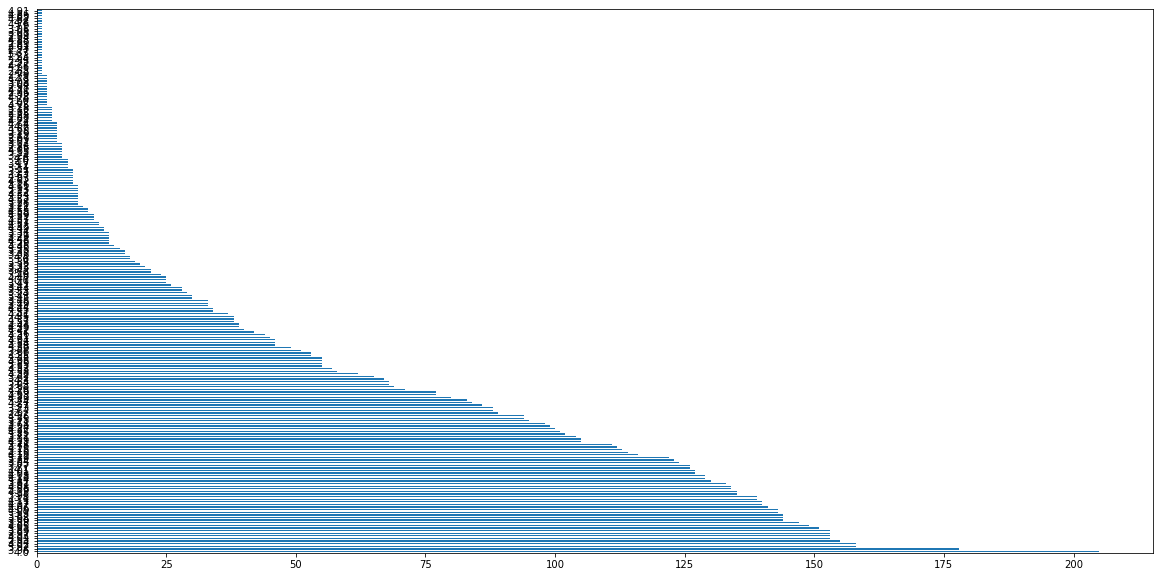

In [116]:
# Find how ratings are distributed
df['average_rating'].value_counts()
plt.figure(figsize=(20,10))
df['average_rating'].value_counts().plot(kind='barh')
#direct way using nunique() method applied to the Series
df['average_rating'].nunique() #too many unique values

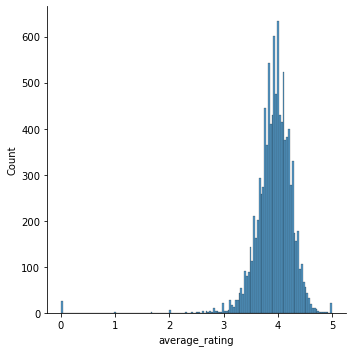

In [117]:
sns.displot(df.average_rating)

In [118]:
# Round values to max 1 decimal
df['avr_rating_rounded']=df['average_rating'].round(1)
df.head(3)
df['avr_rating_rounded'].nunique()

32

<AxesSubplot:>

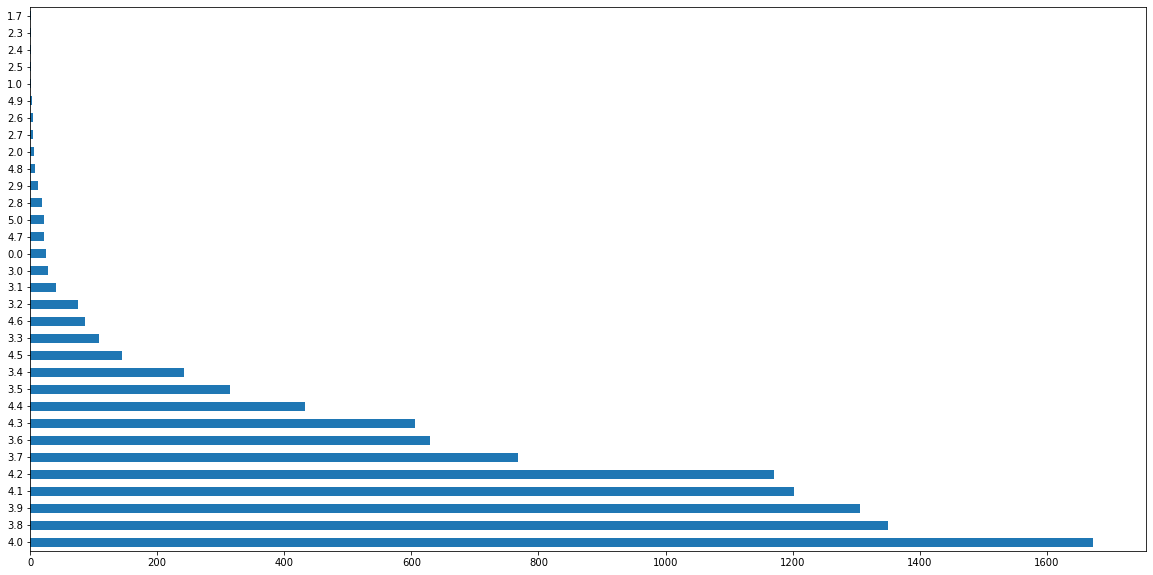

In [119]:
plt.figure(figsize=(20,10))
df['avr_rating_rounded'].value_counts().plot(kind='barh')

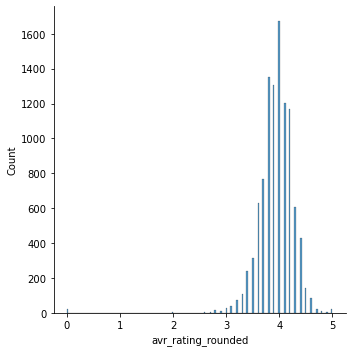

In [121]:
sns.displot(df.avr_rating_rounded)

In [120]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
slots_avrrating={1:'married', 2:'single', 3:'others',0:'unknown'}

In order to apply the transformation to the `marriage` Series, we combine the use of `apply()` method with a **lambda function**.

The lambda function takes in input a numeric value x and  returns the corresponding category.

In [ ]:
lambda x: marital_status[x]

In [ ]:
df['marriage'].apply(lambda x: marital_status[x])

The transformed Series can be assigned to a new Series called `marriage_new`

In [ ]:
df['marriage_new']=df['marriage'].apply(lambda x: marital_status[x])

- DONE - DATA CLEANING - Inspect dataset: check datatypes, missing values, describe data
- DONE - DATA CLEANING - Spaces before the title num_pages -> Remove them
- DONE - DATA CLEANING - Transform publication date into datetime format 
- DATA TRANSFORMATION - Rating count value 0 with an average vote <> 0 -> Transform rating count into categories : a bit, medium, a lot with log function -> Remove data

- DONE - DATA CLEANING - Too many authors (until 51) -> Keep only the first author who is the writer 'main_author' (individuato perchè è scritto prima della ',')
- DONE - DATA CLEANING - Duplicates? - Common titles with different lines -> Keep the max value and add the number of votes
- DONE - DATA CLEANING - Num pages with data 0 -> For 15 of them take the data of the identical book -> The rest, average by publisher
- DONE - DATA CLEANING - 4 lines discrepency between title and data -> Fix data with the right column	
- DONE - DATA CLEANING - Publication date -> Split by year -> Split by season into numerical

- DATA TRANSFORMATION - Language, author and publisher -> Transform in numerical data
- DATA TRANSFORMATION - Transform num pages into category (low, medium, high) -> classic spliting 
- DATA TRANSFORMATION - Transform rating into category (bad, medium, good) -> log function (important data : 91% of data between 3,5 and 4,4, lloks like a normal law)	

- ANALYSIS PART - Create a column average of rating vote -> average by author (keep this one but demonstrate we thought about the other option)	ponderate average by nb of votes

- ISBN13 et 10 -> Find a table equivalent for region/ country	

- AT THE END - Useless column (idbook) -> Delete
- AT THE END - Remove other useless or redundant colums
- AT THE END - Change the order of the columns of the table putting at the beginning those that are the key for prediction purposes then other columns by importance


In [ ]:
# Sort dataset by ID and Start Date (in this order)
df1=df1.sort_values(['User Sys ID', 'Start Date'], ascending=True)
df1.head(20)

In [ ]:
#compute the average job duration

jobnaids = df1[df1["Job Duration"].isna()]["User Sys ID"]
jobnaidsstats = jobnaids.value_counts(dropna = False)
jobnaidsstats


In [ ]:
#average number of skills for each employee
#how many skills for same ID
#count how many observation for the same unit
tmp = df4.groupby("User Sys ID").agg({"User Sys ID": "count"})
df4.set_index("User Sys ID", inplace=True)
df4["N. tech skills"] = tmp
df4.reset_index(inplace=True)

avg_tech_skills = df4['N. tech skills'].mean()
avg_tech_skills

mode_tech_skills = df4['N. tech skills'].mode()[0]
mode_tech_skills

#n. skills wrt average
#df4['Tech_skills vs avg'] = df4['N. tech skills'] / avg_tech_skills

#n. skills wrt mode
df4['Tech_skills vs mode'] = df4['N. tech skills'] / mode_tech_skills